['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0

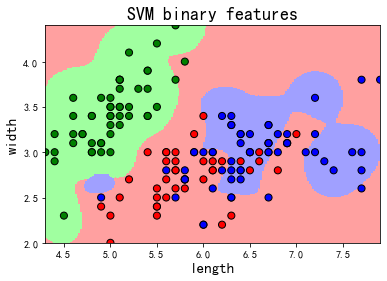

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

iris = load_iris()




x= iris['data']
y= iris['target']

print(dir(iris))
print (x)
print (y)
x = x[:,:2]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1,train_size=0.6)

clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

print (clf.score(x_train, y_train))
print (clf.score(x_test, y_test))


x1_min, x1_max = x[:,0].min(), x[:,0].max()
x2_min, x2_max = x[:,1].min(), x[:,1].max()

x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_hat = clf.predict(grid_test)
grid_hat = grid_hat.reshape(x1.shape)

plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

cm_light = cl.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = cl.ListedColormap(['g','r','b'])
plt.pcolormesh(x1, x2,grid_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k',s=50, cmap=cm_dark)
plt.scatter(x_test[:,0], x_test[:,1], s=120, facecolors='none', zorder=10)
plt.xlabel(u'length', fontsize=15)
plt.ylabel(u'width', fontsize=15)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'SVM binary features', fontsize = 18)
plt.show()

